In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 10]

In [2]:
def get_data(folder):
    data = {}
    for filename in os.listdir(folder):
        if filename.endswith(".csv") and ('progress-' in filename):
            df = pd.read_csv(folder + "/" + filename)
            data[os.path.splitext(filename)[0]] = df
            continue
        else:
            continue
    return data

In [3]:
DATA_DIR = '3rd-party/recurrent-neural-net/data/4x128'
dt = get_data(DATA_DIR)

In [5]:
m = min([len(dt['progress-tanf-500k-m1pro']), len(dt['progress-tanh-500k-m1pro'])])
tf1 = dt['progress-tanf-500k-m1pro'].truncate(after=(m-1))
th1 = dt['progress-tanh-500k-m1pro'].truncate(after=(m-1))

In [6]:
def plot_relative_time(tanf, tanh, title):
    plt.rcParams['figure.figsize'] = [12, 10]
    fw = (tanh['FWtime'] - tanf['FWtime'])/tanh['FWtime']
    bw = (tanh['BWtime'] - tanf['BWtime'])/tanh['BWtime']
    plt.title(title)
    plt.ylabel("Time saving, %")
    plt.xlabel("Iterations, in 1000's")
    plt.plot(fw[4:]*100, label = "Forward")
    plt.plot(bw[4:]*100, label = "Backward")
    plt.legend()
    plt.show()
    
def plot_loss(tanf, tanh, title):
    plt.rcParams['figure.figsize'] = [12, 10]
    plt.title(title)
    plt.ylabel("Loss")
    plt.xlabel("Iterations, in 1000's")
    plt.rcParams['figure.figsize'] = [12, 10]
    plt.plot(tanh['Loss'][4:], label = "Tanh")
    plt.plot(tanf['Loss'][4:], label = "Tanf")
    plt.legend()
    plt.show()
    
def print_time(tanf, tanh):
    t = tanh['FWtime'][-1:] - tanf['FWtime'][-1:]+ tanh['BWtime'][-1:] - tanf['BWtime'][-1:]
    print("Total Time savings: %.3f seconds" % t)

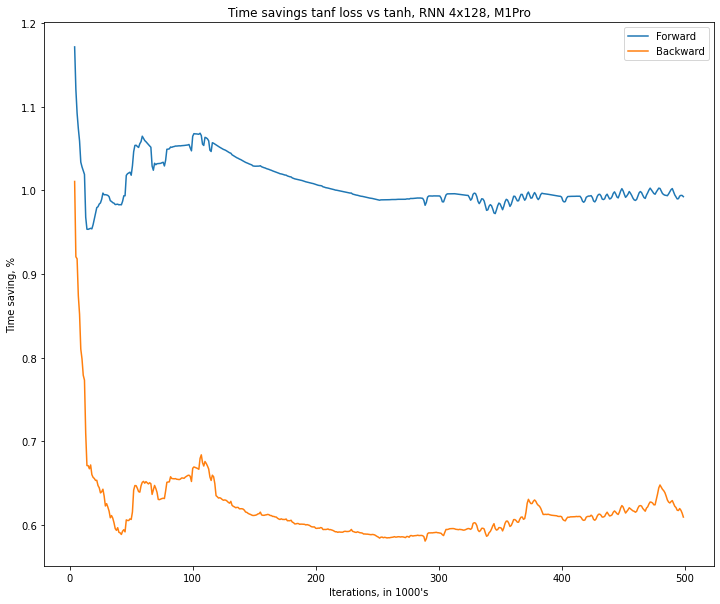

In [10]:
plot_relative_time(tf1, th1, "Time savings tanf loss vs tanh, RNN 4x128, M1Pro")

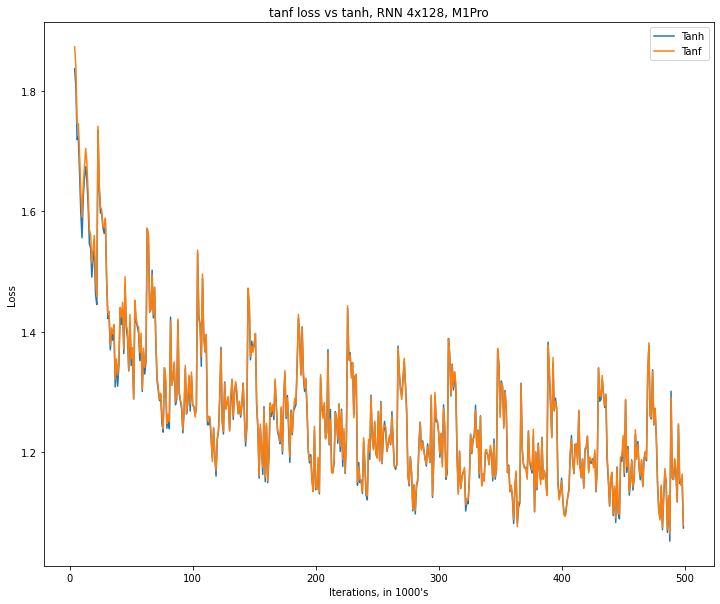

In [8]:
plot_loss(tf1, th1, "tanf loss vs tanh, RNN 4x128, M1Pro")

In [9]:
print_time(tf1, th1)

Total Time savings: 491.244 seconds


In [9]:
m = min([len(dt['progress-tanf-320k-i9-wsl']), len(dt['progress-tanh-320k-i9-wsl'])])
tf2 = dt['progress-tanf-320k-i9-wsl'].truncate(after=(m-1))
th2 = dt['progress-tanh-320k-i9-wsl'].truncate(after=(m-1))

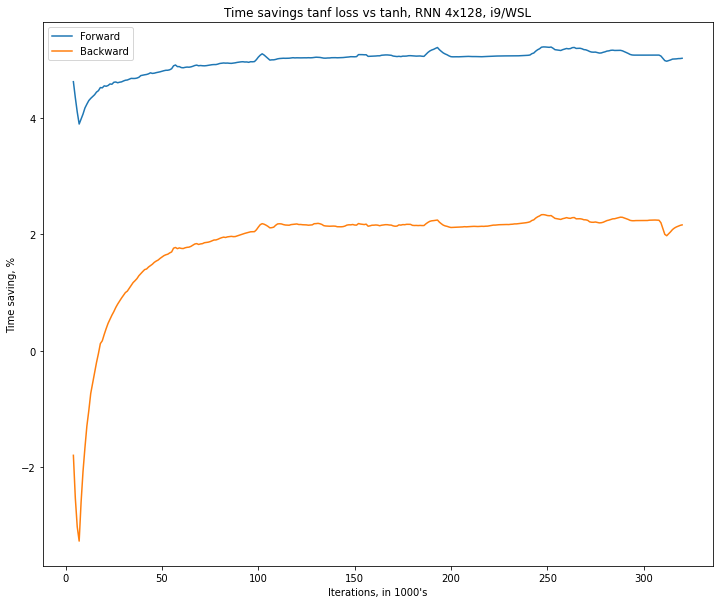

In [11]:
plot_relative_time(tf2, th2, "Time savings tanf loss vs tanh, RNN 4x128, i9/WSL")

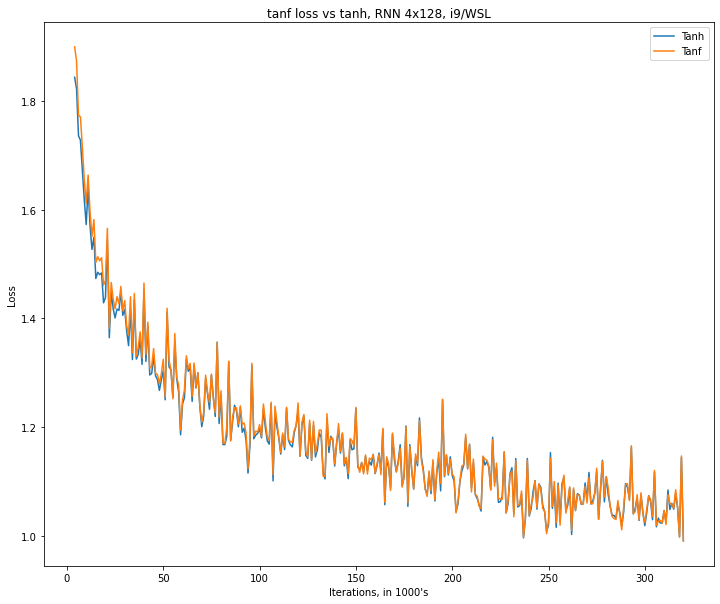

In [12]:
plot_loss(tf2, th2, "tanf loss vs tanh, RNN 4x128, i9/WSL")